In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/ozone_dose_cost.csv")

In [3]:
df.head()

,Cost,Dose,Flow_mgd
0,1000,1,1
1,2000,5,1
2,3000,10,1
3,4000,15,1
4,5300,20,1


In [4]:
df.columns = ['y', 'Feature1', "Feature2"]

In [5]:
df_copy = df.copy(deep=True)
del df_copy["y"]
X = df_copy.values.tolist()

In [6]:
# for i in df.columns:
#     df.plot.scatter(i,'y', edgecolors=(0,0,0),s=50,c='g',grid=True)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
linear_model = LinearRegression(normalize=True)

In [9]:
X_linear=df.drop('y',axis=1)
y_linear=df['y']

In [10]:
linear_model.fit(X_linear,y_linear)

LinearRegression(normalize=True)

In [11]:
y_pred_linear = linear_model.predict(X_linear)

In [12]:
RMSE_linear = np.sqrt(np.sum(np.square(y_pred_linear-y_linear)))


In [13]:
print("Root-mean-square error of linear model:",RMSE_linear)

Root-mean-square error of linear model: 16819.343631267904


In [14]:
coeff_linear = pd.DataFrame(linear_model.coef_,index=df.drop('y',axis=1).columns, columns=['Linear model coefficients'])
coeff_linear

,Linear model coefficients
Feature1,628.387097
Feature2,426.332260


In [15]:
print ("R2 value of linear model:",linear_model.score(X_linear,y_linear))

R2 value of linear model: 0.8120972671671047


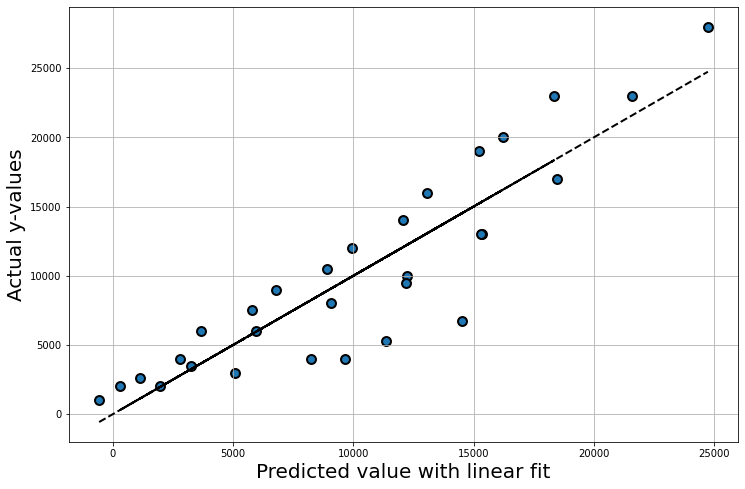

In [16]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with linear fit",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred_linear,y_linear,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred_linear,y_pred_linear, 'k--', lw=2)

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
poly = PolynomialFeatures(3,include_bias=False)

In [19]:
X_poly = poly.fit_transform(X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1', 'Feature2', 'Feature1^2', 'Feature1 Feature2', 'Feature2^2', 'Feature1^3', 'Feature1^2 Feature2', 'Feature1 Feature2^2', 'Feature2^3']
9


In [20]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature1^2,Feature1 Feature2,Feature2^2,Feature1^3,Feature1^2 Feature2,Feature1 Feature2^2,Feature2^3
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,5.0,1.0,25.0,5.0,1.0,125.0,25.0,5.0,1.0
2,10.0,1.0,100.0,10.0,1.0,1000.0,100.0,10.0,1.0
3,15.0,1.0,225.0,15.0,1.0,3375.0,225.0,15.0,1.0
4,20.0,1.0,400.0,20.0,1.0,8000.0,400.0,20.0,1.0


In [21]:
df_poly['y']=df['y']
df_poly.head()

,Feature1,Feature2,Feature1^2,Feature1 Feature2,Feature2^2,Feature1^3,Feature1^2 Feature2,Feature1 Feature2^2,Feature2^3,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000
1,5.0,1.0,25.0,5.0,1.0,125.0,25.0,5.0,1.0,2000
2,10.0,1.0,100.0,10.0,1.0,1000.0,100.0,10.0,1.0,3000
3,15.0,1.0,225.0,15.0,1.0,3375.0,225.0,15.0,1.0,4000
4,20.0,1.0,400.0,20.0,1.0,8000.0,400.0,20.0,1.0,5300


In [22]:
X_train=df_poly.drop('y',axis=1)
y_train=df_poly['y']

In [23]:
poly = LinearRegression(normalize=True)

In [24]:
model_poly=poly.fit(X_train,y_train)
y_poly = poly.predict(X_train)
RMSE_poly=np.sqrt(np.sum(np.square(y_poly-y_train)))
print("Root-mean-square error of simple polynomial model:",RMSE_poly)

Root-mean-square error of simple polynomial model: 3832.480524457293


In [25]:
coeff_poly = pd.DataFrame(model_poly.coef_,index=df_poly.drop('y',axis=1).columns, 
                          columns=['Coefficients polynomial model'])
coeff_poly

,Coefficients polynomial model
Feature1,368.102450
Feature2,1791.438021
Feature1^2,-21.175172
Feature1 Feature2,90.512396
Feature2^2,-193.610779
Feature1^3,0.603803
Feature1^2 Feature2,0.031383
Feature1 Feature2^2,-2.426196
Feature2^3,5.221465


In [26]:
print ("R2 value of simple polynomial model:",model_poly.score(X_train,y_train))

R2 value of simple polynomial model: 0.9902439296703335


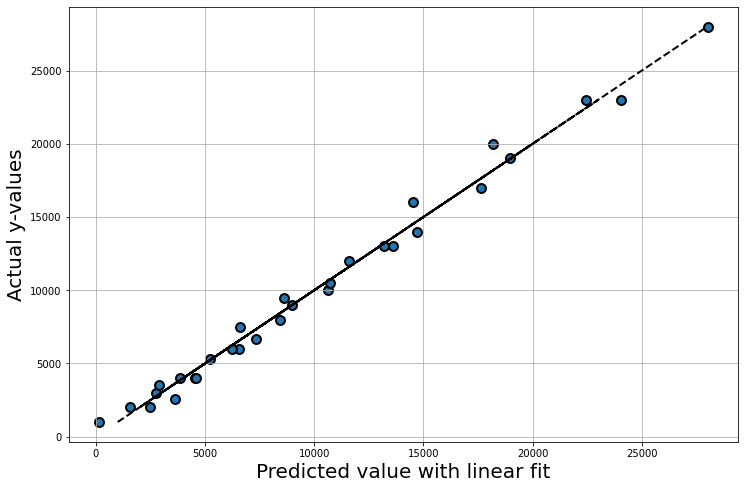

In [27]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with linear fit",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_poly,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_train,y_train, 'k--', lw=2)

In [45]:
from sklearn.linear_model import LassoCV

In [46]:
model1 = LassoCV(cv=10,verbose=0,normalize=True,eps=0.001,n_alphas=100, 
                 tol=0.0005,max_iter=5000)

In [47]:
model1.fit(X_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True, tol=0.0005, verbose=0)

In [48]:
y_pred1 = np.array(model1.predict(X_train))

In [49]:
RMSE_1=np.sqrt(np.sum(np.square(y_pred1-y_train)))
print("Root-mean-square error of Metamodel:",RMSE_1)

Root-mean-square error of Metamodel: 6356.958062536633


In [50]:
coeff1 = pd.DataFrame(model1.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

KeyError: "['y'] not found in axis"

In [51]:
model1.score(X_train,y_train)

0.9731580723166765

In [99]:
model1.alpha_

6.36723518924302

In [100]:
coeff1[coeff1['Coefficients Metamodel']!=0]

,Coefficients Metamodel
Feature1,193.557501
Feature2,251.158898
Feature1 Feature2,79.424996
Feature1^3,0.064658
Feature1 Feature2^2,-1.997650
Feature2^3,-0.216238


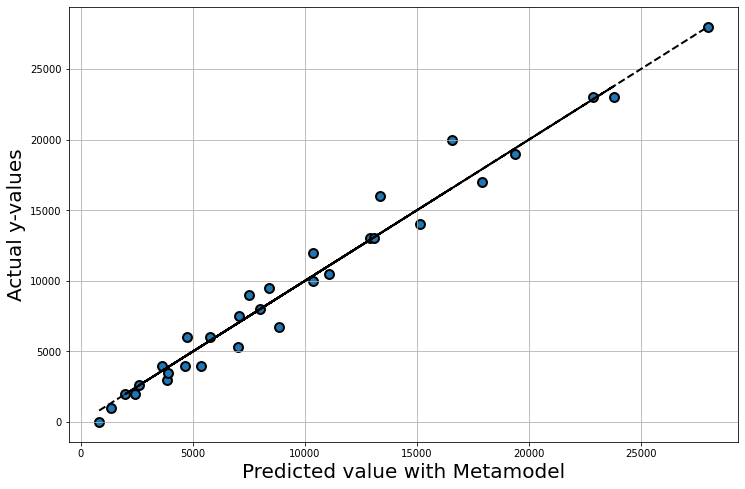

In [101]:
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'k--', lw=2)

In [190]:
# # Display results
# m_log_alphas = -np.log10(model1.alphas_)

# plt.figure()
# ymin, ymax = 2300, 3800
# plt.plot(m_log_alphas, model1.mse_path_, ':')
# plt.plot(m_log_alphas, model1.mse_path_.mean(axis=-1), 'k',
#          label='Average across the folds', linewidth=2)
# plt.axvline(-np.log10(model1.alpha_), linestyle='--', color='k',
#             label='alpha: CV estimate')
# plt.legend()

# plt.xlabel('-log(alpha)')
# plt.ylabel('Mean square error')
# plt.axis('tight')

In [28]:
coeff_poly

,Coefficients polynomial model
Feature1,368.102450
Feature2,1791.438021
Feature1^2,-21.175172
Feature1 Feature2,90.512396
Feature2^2,-193.610779
Feature1^3,0.603803
Feature1^2 Feature2,0.031383
Feature1 Feature2^2,-2.426196
Feature2^3,5.221465


In [29]:
new_X = []
dose_list = []
flow_list = []
for dose1 in range(0, 30):
    for flow1 in range(0, 30):
        new_X.append([dose1, flow1])
        dose_list.append(dose1)
        flow_list.append(flow1)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly = PolynomialFeatures(3,include_bias=False)

In [32]:
X_poly = poly.fit_transform(new_X)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(1,6)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1', 'Feature2', 'Feature1^2', 'Feature1 Feature2', 'Feature2^2', 'Feature1^3', 'Feature1^2 Feature2', 'Feature1 Feature2^2', 'Feature2^3']
9


In [33]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature1^2,Feature1 Feature2,Feature2^2,Feature1^3,Feature1^2 Feature2,Feature1 Feature2^2,Feature2^3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0
3,0.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,27.0
4,0.0,4.0,0.0,0.0,16.0,0.0,0.0,0.0,64.0


In [34]:
a1 = 0
for feature in list(coeff_poly.reset_index()["index"]):
    print(feature)

    a1 = a1 + getattr(df_poly, feature) * coeff_poly.loc[feature].values[0]


Feature1
Feature2
Feature1^2
Feature1 Feature2
Feature2^2
Feature1^3
Feature1^2 Feature2
Feature1 Feature2^2
Feature2^3


In [ ]:
f1 = m.fs.XXX.flow_vol_in[t]
f2 = m.fs.XXX.conc_mass[t, TOC]
a1
a2
a2
a3


In [35]:
df1 = pd.DataFrame()
df1["cost"] = a1
df1["dose_list"] = dose_list
df1["flow_list"] = flow_list

In [38]:
df1[df1.dose_list == 5]

,cost,dose_list,flow_list
150,1386.608261,5,0
151,3430.872555,5,1
152,5094.982126,5,2
153,6410.265767,5,3
154,7408.052270,5,4
155,8119.670428,5,5
156,8576.449032,5,6
157,8809.716875,5,7
158,8850.802750,5,8
159,8731.035448,5,9
